# Usecase - 2: False Alarm Detection

This requirement was for a food industry where raw food items like meat, vegetables are packed and dispatched to the market. So this factory has deep freezer areas for meat and vegetable storage where the temperature is below zero degree Celsius. In such areas, mostly nitrogen sprinkler systems are used for firefighting. 

In case of a false alarm, nitrogen would be wasted, food items would be damaged plus the entire system has to be recalibrated which was clearly an unnecessary expense.

We used Decision Tree Algorithm to know whether it was a true or false alarm.  In case of 0, it is a false alarm. So the nitrogen sprinkler system will not activate. In case of 1, it is a dangerous situation, so the sprinkler system will activate to extinguish the fire. Hence, it helped our client to save a great deal of monetary sum in long run

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
df = pd.read_excel('Usecase_2_False_Alarm_detection.xlsx')

In [71]:
df.head()

,Sr. no.,Case ID,Ambient temperature (degF),Calibration (days),Unwanted substance deposition (YES/NO),Relative humidity (%),Dangerous (YES/NO)
0,1,C-PL-0001,15.0,190.0,YES,95.0,NO
1,2,C-PL-0002,10.0,143.0,YES,89.0,NO
2,3,C-PL-0003,21.0,97.0,NO,80.0,YES
3,4,C-PL-0004,NaN,180.0,NO,NaN,NO
4,5,C-PL-0005,27.0,198.0,NO,79.0,YES


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Sr. no.                                 50 non-null     int64  
 1   Case ID                                 50 non-null     object 
 2   Ambient temperature (degF)              45 non-null     float64
 3   Calibration (days)                      47 non-null     float64
 4   Unwanted substance deposition (YES/NO)  50 non-null     object 
 5   Relative humidity (%)                   45 non-null     float64
 6   Dangerous (YES/NO)                      50 non-null     object 
dtypes: float64(3), int64(1), object(3)
memory usage: 2.9+ KB


In [73]:
# Converting the values of Non-numeric column and target column into numeric
df = pd.get_dummies(data=df, columns=['Dangerous (YES/NO)','Unwanted substance deposition (YES/NO)'], drop_first=True)

In [74]:
df.head()

,Sr. no.,Case ID,Ambient temperature (degF),Calibration (days),Relative humidity (%),Dangerous (YES/NO)_YES,Unwanted substance deposition (YES/NO)_YES
0,1,C-PL-0001,15.0,190.0,95.0,0,1
1,2,C-PL-0002,10.0,143.0,89.0,0,1
2,3,C-PL-0003,21.0,97.0,80.0,1,0
3,4,C-PL-0004,NaN,180.0,NaN,0,0
4,5,C-PL-0005,27.0,198.0,79.0,1,0


In [75]:
#Dropping all unwanted columns
df = df.drop(['Sr. no.','Case ID'],axis=1)

In [77]:
df.head()

,Ambient temperature (degF),Calibration (days),Relative humidity (%),Dangerous (YES/NO)_YES,Unwanted substance deposition (YES/NO)_YES
0,15.0,190.0,95.0,0,1
1,10.0,143.0,89.0,0,1
2,21.0,97.0,80.0,1,0
3,NaN,180.0,NaN,0,0
4,27.0,198.0,79.0,1,0


In [79]:
# Renaming the column names into standard format by removing spaces etc.
df.columns = ['ambient_temperature_(degF)', 'calibration_(days)',
       'relative_humidity_(%)', 'dangerous_(0/1)',
       'unwanted_substance_deposition_(0/1)']

In [81]:
# Rearranging the order of columns
df = df[['ambient_temperature_(degF)', 'calibration_(days)','relative_humidity_(%)',
       'unwanted_substance_deposition_(0/1)','dangerous_(0/1)']]
df.head()

,ambient_temperature_(degF),calibration_(days),relative_humidity_(%),unwanted_substance_deposition_(0/1),dangerous_(0/1)
0,15.0,190.0,95.0,1,0
1,10.0,143.0,89.0,1,0
2,21.0,97.0,80.0,0,1
3,NaN,180.0,NaN,0,0
4,27.0,198.0,79.0,0,1


In [86]:
# Checking for Null values
df.isnull().sum()

ambient_temperature_(degF)             5
calibration_(days)                     3
relative_humidity_(%)                  5
unwanted_substance_deposition_(0/1)    0
dangerous_(0/1)                        0
dtype: int64

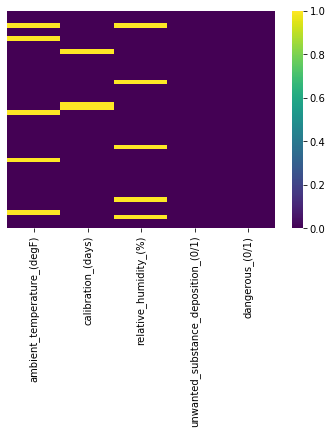

In [97]:
# Visualising Null values in Heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [102]:
#Replacing Null values with mean
df['ambient_temperature_(degF)'] = df['ambient_temperature_(degF)'].fillna(df['ambient_temperature_(degF)'].mean())
df['ambient_temperature_(degF)']=df['ambient_temperature_(degF)'].astype(int)

df['calibration_(days)'] = df['calibration_(days)'].fillna(df['calibration_(days)'].mean())
df['calibration_(days)']=df['calibration_(days)'].astype(int)

df['relative_humidity_(%)'] = df['relative_humidity_(%)'].fillna(df['relative_humidity_(%)'].mean())
df['relative_humidity_(%)']=df['relative_humidity_(%)'].astype(int)

In [104]:
# Finally checking for any leftover Null values
df.isnull().sum()

ambient_temperature_(degF)             0
calibration_(days)                     0
relative_humidity_(%)                  0
unwanted_substance_deposition_(0/1)    0
dangerous_(0/1)                        0
dtype: int64

In [105]:
# Checking for correlation
df.corr()

,ambient_temperature_(degF),calibration_(days),relative_humidity_(%),unwanted_substance_deposition_(0/1),dangerous_(0/1)
ambient_temperature_(degF),1.000000,-0.273096,-0.705667,-0.295044,0.818204
calibration_(days),-0.273096,1.000000,0.321348,-0.023017,-0.476113
relative_humidity_(%),-0.705667,0.321348,1.000000,0.244339,-0.776541
unwanted_substance_deposition_(0/1),-0.295044,-0.023017,0.244339,1.000000,-0.309199
dangerous_(0/1),0.818204,-0.476113,-0.776541,-0.309199,1.000000


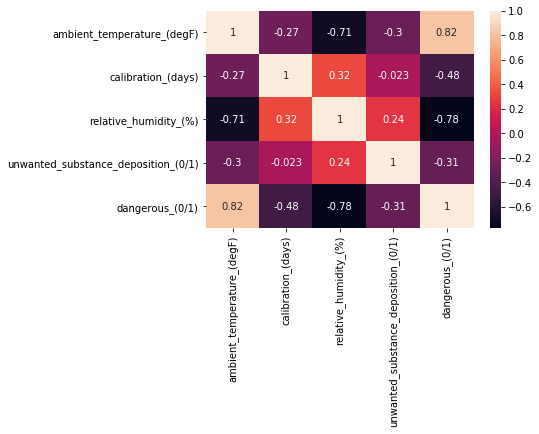

In [106]:
# Checking for correlation in heatmap
sns.heatmap(df.corr(), annot=True)

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
x = df.drop('dangerous_(0/1)', axis=1)
x.head()

,ambient_temperature_(degF),calibration_(days),relative_humidity_(%),unwanted_substance_deposition_(0/1)
0,15,190,95,1
1,10,143,89,1
2,21,97,80,0
3,19,180,86,0
4,27,198,79,0


In [109]:
y = df['dangerous_(0/1)']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: dangerous_(0/1), dtype: uint8

In [147]:
# Splitting the data into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)

In [148]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [173]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [155]:
# Assigning the Algorithm to an object
dt = DecisionTreeClassifier()

In [151]:
#Fitting our training data into the Algorithm
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [152]:
# Predicting from our test data
y.pred = dt.predict(x_test)

In [153]:
confusion_matrix(y_test, y.pred)

array([[8, 1],
       [0, 6]], dtype=int64)

In [154]:
#Checking the accuracy score
accuracy_score(y_test, y.pred)

0.9333333333333333

Conclusion: We have acheived a good level of accuracy for the model with the help of Decision Tree Alogrithm. 